In [1]:
import collections
import pandas
import matplotlib, seaborn, numpy
from matplotlib import pyplot

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline


In [2]:
df = pandas.read_csv("/Users/tim/Dropbox/sinai/projects/phip-seq-ml/201711/train.20171126.csv.bz2")
df

,id,uniprot_accession,sequence_aa,num_sequences,max_uniprot,max_id,ratio
0,10000|D2XQA7|533-588,D2XQA7,GTSGFAELLHALHLDSLNLIPAINCSKITADKIIATVPLPHVTYII...,26,230.68,15.73,0.068190
1,10001|D2XQA7|561-616,D2XQA7,TADKIIATVPLPHVTYIISSEAISNAVVYEVSEIFLKSAMFISAIK...,26,230.68,7.73,0.033510
2,10002|D2XQA7|589-644,D2XQA7,YEVSEIFLKSAMFISAIKPDCSGFNFSQIDRHIPIVYNISTPRRGC...,26,230.68,14.08,0.061037
3,10003|D2XQA7|617-672,D2XQA7,IDRHIPIVYNISTPRRGCPLCDSVIMSYDESDGLQSLMYVTNERVQ...,26,230.68,7.39,0.032036
4,10004|D2XQA7|645-700,D2XQA7,DESDGLQSLMYVTNERVQTNLFLDKSPFFDNNNLHIHYLWLRDNGT...,26,230.68,22.33,0.096801
5,10005|D2XQA7|673-728,D2XQA7,FDNNNLHIHYLWLRDNGTVVEIRGMYRRRAASALFLILSFIGFSGV...,26,230.68,9.12,0.039535
6,10006|D2XQA7|701-730,D2XQA7,RAASALFLILSFIGFSGVIYFLYRLFSILY,26,230.68,12.28,0.053234
7,1000|A5I8J1|169-205,A5I8J1,DWKVCQRIVGLLGFAAPFTQCGYPALMPLYACIQAKQ,7,117.63,42.42,0.360622
8,10012|D2XQC4|1-56,D2XQC4,MRASKSDRFLMSSWVKLLFVAVIMYICSAVVPMAATYEGLGFPCYF...,14,414.12,7.99,0.019294
9,10013|D2XQC4|29-84,D2XQC4,AVVPMAATYEGLGFPCYFNNLVNYSALNLTVRNSAKHLTPTLFLEK...,14,414.12,13.35,0.032237


In [3]:
df["binary_label"] = df.ratio > 0.5
df

,id,uniprot_accession,sequence_aa,num_sequences,max_uniprot,max_id,ratio,binary_label
0,10000|D2XQA7|533-588,D2XQA7,GTSGFAELLHALHLDSLNLIPAINCSKITADKIIATVPLPHVTYII...,26,230.68,15.73,0.068190,False
1,10001|D2XQA7|561-616,D2XQA7,TADKIIATVPLPHVTYIISSEAISNAVVYEVSEIFLKSAMFISAIK...,26,230.68,7.73,0.033510,False
2,10002|D2XQA7|589-644,D2XQA7,YEVSEIFLKSAMFISAIKPDCSGFNFSQIDRHIPIVYNISTPRRGC...,26,230.68,14.08,0.061037,False
3,10003|D2XQA7|617-672,D2XQA7,IDRHIPIVYNISTPRRGCPLCDSVIMSYDESDGLQSLMYVTNERVQ...,26,230.68,7.39,0.032036,False
4,10004|D2XQA7|645-700,D2XQA7,DESDGLQSLMYVTNERVQTNLFLDKSPFFDNNNLHIHYLWLRDNGT...,26,230.68,22.33,0.096801,False
5,10005|D2XQA7|673-728,D2XQA7,FDNNNLHIHYLWLRDNGTVVEIRGMYRRRAASALFLILSFIGFSGV...,26,230.68,9.12,0.039535,False
6,10006|D2XQA7|701-730,D2XQA7,RAASALFLILSFIGFSGVIYFLYRLFSILY,26,230.68,12.28,0.053234,False
7,1000|A5I8J1|169-205,A5I8J1,DWKVCQRIVGLLGFAAPFTQCGYPALMPLYACIQAKQ,7,117.63,42.42,0.360622,False
8,10012|D2XQC4|1-56,D2XQC4,MRASKSDRFLMSSWVKLLFVAVIMYICSAVVPMAATYEGLGFPCYF...,14,414.12,7.99,0.019294,False
9,10013|D2XQC4|29-84,D2XQC4,AVVPMAATYEGLGFPCYFNNLVNYSALNLTVRNSAKHLTPTLFLEK...,14,414.12,13.35,0.032237,False


In [4]:
cross_val_score_args = {'cv': 5, 'n_jobs': -1, "scoring": "roc_auc", "groups": df.uniprot_accession.values}
scores = collections.OrderedDict()

In [5]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=(1, 1))),
    ('clf', SGDClassifier()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["SGDClassifier kmers=1"] = (score, pipeline)
score

array([ 0.66538318,  0.60121816,  0.73246618,  0.58350373,  0.65652329])

In [6]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=(1, 2))),
    ('clf', SGDClassifier()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["SGDClassifier kmers=1,2"] = (score, pipeline)
score

array([ 0.6357159 ,  0.62604942,  0.7203985 ,  0.62598312,  0.70311943])

In [7]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=(1, 1))),
    ('clf', LogisticRegression()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["LogisticRegression kmers=1"] = (score, pipeline)
score

array([ 0.76385384,  0.77807428,  0.77268834,  0.73930404,  0.76863854])

In [8]:
ngram_range = (1, 2)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=ngram_range)),
    ('clf', LogisticRegression()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["LogisticRegression kmers=%s" % ','.join(str(x) for x in ngram_range)] = (score, pipeline)
score

array([ 0.76284903,  0.76709659,  0.76900938,  0.74046237,  0.7663363 ])

In [9]:
ngram_range = (1, 1)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=ngram_range)),
    ('clf', RandomForestClassifier()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["RandomForestClassifier kmers=%s" % ','.join(str(x) for x in ngram_range)] = (score, pipeline)
score

array([ 0.70939181,  0.71480343,  0.73530531,  0.69933471,  0.73990398])

In [10]:
ngram_range = (1, 2)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=ngram_range)),
    ('clf', RandomForestClassifier()),
])
score = cross_val_score(
    pipeline,
    df.sequence_aa.values,
    df.binary_label,
    **cross_val_score_args)
scores["RandomForestClassifier kmers=%s" % ','.join(str(x) for x in ngram_range)] = (score, pipeline)
score

array([ 0.70322575,  0.70272305,  0.70604355,  0.69201934,  0.73350604])

In [11]:
scores_rows = []
for (label, (values, pipeline)) in scores.items():
    for v in values:
        scores_rows.append([label, v, pipeline])

scores_df = pandas.DataFrame(scores_rows, columns=["label", "value", "pipeline"])
scores_df

,label,value,pipeline
0,SGDClassifier kmers=1,0.665383,"Pipeline(steps=[('vect', CountVectorizer(analy..."
1,SGDClassifier kmers=1,0.601218,"Pipeline(steps=[('vect', CountVectorizer(analy..."
2,SGDClassifier kmers=1,0.732466,"Pipeline(steps=[('vect', CountVectorizer(analy..."
3,SGDClassifier kmers=1,0.583504,"Pipeline(steps=[('vect', CountVectorizer(analy..."
4,SGDClassifier kmers=1,0.656523,"Pipeline(steps=[('vect', CountVectorizer(analy..."
5,"SGDClassifier kmers=1,2",0.635716,"Pipeline(steps=[('vect', CountVectorizer(analy..."
6,"SGDClassifier kmers=1,2",0.626049,"Pipeline(steps=[('vect', CountVectorizer(analy..."
7,"SGDClassifier kmers=1,2",0.720398,"Pipeline(steps=[('vect', CountVectorizer(analy..."
8,"SGDClassifier kmers=1,2",0.625983,"Pipeline(steps=[('vect', CountVectorizer(analy..."
9,"SGDClassifier kmers=1,2",0.703119,"Pipeline(steps=[('vect', CountVectorizer(analy..."


/Users/tim/miniconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


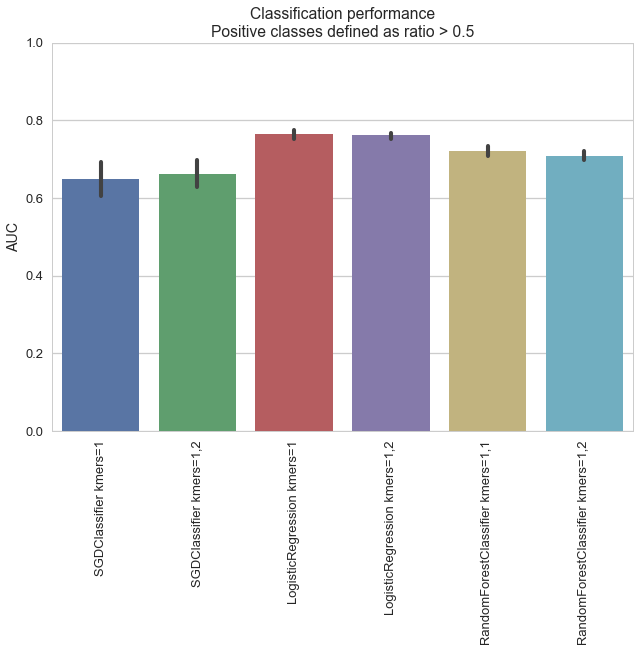

In [12]:
seaborn.set_context('talk')
seaborn.set_style('whitegrid')
seaborn.barplot(x="label", y="value", data=scores_df)
pyplot.ylim(ymin=0, ymax=1)
pyplot.xticks(rotation=90)
pyplot.xlabel("")
pyplot.ylabel("AUC")
pyplot.title("Classification performance\nPositive classes defined as ratio > 0.5")

In [13]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer="char", ngram_range=(1, 1))),
    ('clf', LogisticRegression()),
])
pipeline.fit(
    df.sequence_aa.values,
    df.binary_label)


Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
m = pipeline.steps[1][1]
t = pipeline.steps[0][1]
coefs = pandas.Series(dict(zip(pandas.Series(t.vocabulary_).sort_values().index, m.coef_[0]))).to_frame()
coefs.columns = ['coef']
coefs['amino_acid'] = coefs.index.str.upper()
coefs = coefs.reset_index(drop=True)
coefs

,coef,amino_acid
0,-0.086349,A
1,-0.173997,C
2,0.047130,D
3,-0.022963,E
4,-0.277351,F
5,-0.066088,G
6,-0.033556,H
7,-0.187651,I
8,0.028267,K
9,-0.188822,L


/Users/tim/miniconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


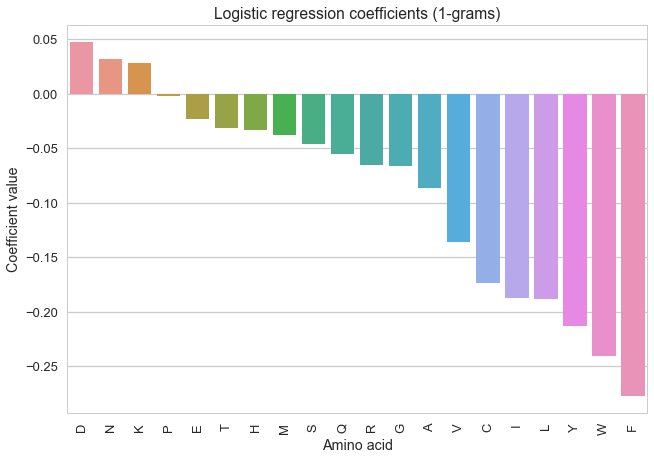

In [15]:
seaborn.set_context('talk')
seaborn.set_style('whitegrid')
seaborn.barplot(x="amino_acid", y="coef", data=coefs.sort_values("coef", ascending=False))
#pyplot.ylim(ymin=0, ymax=1)
pyplot.xticks(rotation=90)
pyplot.xlabel("")
pyplot.ylabel("Coefficient value")
pyplot.xlabel("Amino acid")
pyplot.title("Logistic regression coefficients (1-grams)")